## 1\. Contexto

O principal objetivo deste projeto é a análise exploratória de dados logísticos da empresa [Loggi](https://www.loggi.com/) mais precisamente na região do distrito federal onde estão localizados 3 hubs de distribuição, a ideia do projeto é de coletar esses dados e transformá-los em informações visuais como  por exemplo, gráficos e mapas.



**Durante a expoloração dos dados farei algumas análises sobre as informações obtidas e ao final irei resumir os insights dessas análises.**

## 2\. Pacotes e bibliotecas

Para a realização deste projeto é necessária a intalação e importação dos pacotes e bibliotecas a seguir.

In [ ]:
!pip3 install geopandas;

In [ ]:
import pandas as pd
import numpy as np
import requests
import pprint
import json
import geopy
import geopandas
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


## 3\. Exploração de dados

iniciaremos com a extração dos dados a partir do [link](https://github.com/andre-marcos-perez/ebac-course-utils/blob/main/dataset/deliveries.json), verificando se a requisição deu certo ou não e então vamos trabalhar com os dados, caso a resposta do terminal seja "<Response 200>" significa que a requisição foi feita com sucesso.
Lembrando que esse link me traz dados em formato json

In [ ]:
# Codigo para retornar a requisicao do link

link = 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json'

requisicao = requests.get(link, verify=False)
print(requisicao) # Me retorna a resposta da requisição

info = requisicao.json()
print("Qauntidade de dados presentes no arquivo .json: " , len(info)) # Me retorna o tamanho do dado



/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<Response [200]>
Qauntidade de dados presentes no arquivo .json:  199


Após realizar a requisição do conteúdo do link e realizar a extração das informações foi utilizado algumas linhas de códigos para se verificar o conteúdo dos dados

In [ ]:
len(info) # verificar a quantidade de dados presentes

199

In [ ]:
# mostra as chaves na estrutura dos dados
exemplo = info[0] # lembrando que esse valor na chave poderia ser entre 0 e 198, pois o tamanho da estrutura dos dados é de 199
print(exemplo.keys())

dict_keys(['name', 'region', 'origin', 'vehicle_capacity', 'deliveries'])


Os códigos abaixo vão puxar informações do indíce que foi passado entre chaves no código acima

In [ ]:
exemplo['name'] # mostra o id do primeiro entregador dos dados

'cvrp-2-df-33'

In [ ]:
exemplo['region'] # mostra a região do primeiro entregador dos dados

'df-2'

In [ ]:
exemplo['origin'] # mostra a localização em longitude e latitude do primeiro entregador dos dados

{'lng': -48.05498915846707, 'lat': -15.83814451122274}

In [ ]:
exemplo['vehicle_capacity'] # capacidade do veiculo de entrega

180

In [ ]:
exemplo['deliveries'][0]['point'] # ponto em longitude e latitude da primeira entrega desse entregador

{'lng': -48.11618888384239, 'lat': -15.848929154862294}

In [ ]:
exemplo_deliveries = exemplo['deliveries'][0] # retorna as chaves da primeira entrega na lista desse entregador
print(exemplo_deliveries.keys())

id = exemplo_deliveries['id'] # retorna o id da entrega
deliveries = exemplo_deliveries['point'] # retorna o ponto em latitude e longitude da entrega
size = exemplo_deliveries['size'] # retorna o tamanho do produto desta entrega
print('id: ', id)
print("lng e lat: ", deliveries)
print("size: " , size)

dict_keys(['id', 'point', 'size'])
id:  313483a19d2f8d65cd5024c8d215cfbd
lng e lat:  {'lng': -48.11618888384239, 'lat': -15.848929154862294}
size:  9


A seguir faremos a criação de um Data frame com as informações extraídas.

In [ ]:
deliveries_df = pd.DataFrame(info) # transforma as informações do json em um Data frame com pandas
deliveries_df.head() # mostra os primeiros intens desse data frame

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


Podemos notar que as colunas **origin** e **deliveries** estão com dados aninhados na coluna origin e com uma forma de lista na coluna deliveries, fica mais evidente com a utilização dos códigos abaixo.

In [ ]:
deliveries_df['origin'] # retorna os dados da coluna origin

0      {'lng': -48.05498915846707, 'lat': -15.8381445...
1      {'lng': -48.05498915846707, 'lat': -15.8381445...
2      {'lng': -48.05498915846707, 'lat': -15.8381445...
3      {'lng': -47.89366206897872, 'lat': -15.8051175...
4      {'lng': -48.05498915846707, 'lat': -15.8381445...
                             ...                        
194    {'lng': -47.89366206897872, 'lat': -15.8051175...
195    {'lng': -47.802664728268745, 'lat': -15.657013...
196    {'lng': -47.89366206897872, 'lat': -15.8051175...
197    {'lng': -48.05498915846707, 'lat': -15.8381445...
198    {'lng': -48.05498915846707, 'lat': -15.8381445...
Name: origin, Length: 199, dtype: object

In [ ]:
deliveries_df['deliveries'] # retorna os dados da coluna deliveries

0      [{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...
1      [{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...
2      [{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...
3      [{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...
4      [{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...
                             ...                        
194    [{'id': 'fc800db1942651f8195f870c5930ca26', 'p...
195    [{'id': '3d50e820e1c16621e1fa19f1a7df0c56', 'p...
196    [{'id': 'e6cffd090ce2a7bd0e0292f1ed9acd3', 'po...
197    [{'id': '51b1354b02a20d919b83bb664ea4d845', 'p...
198    [{'id': '1a54fdc3c8748ab714841127950e6b3d', 'p...
Name: deliveries, Length: 199, dtype: object

Vamos tratar os dados dessas duas colunas mais pra frente, antes vamos analisar algumas informações desse data frame para entender os dados

In [ ]:
deliveries_df.columns # mostra as colunas desse data frame

Index(['name', 'region', 'origin', 'vehicle_capacity', 'deliveries'], dtype='object')

In [ ]:
deliveries_df.shape # mostra o tamanho do data frame com numero de linhas seguido do numero de colunas

(199, 5)

In [ ]:
deliveries_df.info() # mostra informações dos dados das colunas como quantidade de linhas, se tem valores nulos ou não e o type dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              199 non-null    object
 1   region            199 non-null    object
 2   origin            199 non-null    object
 3   vehicle_capacity  199 non-null    int64 
 4   deliveries        199 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.9+ KB


In [ ]:
deliveries_df.index # me retorna o inicio do index desse data frame, o final e o step que são literalmente os passos que esse index está contando, nesse caso de 1 em 1

RangeIndex(start=0, stop=199, step=1)

**Tratando a coluna origin:**

Com o método json_normalize transformamos os dados que estão nessa coluna em duas colunas separadas.

In [ ]:
hub_origin_df = pd.json_normalize(deliveries_df['origin']) # aqui tratamos os dados
hub_origin_df.head() # retorna os primeiros 5 valores do dataframe

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


Após tratar os dados que antes estavam aninhados, eles foram inseridos novamente no data frame original com o codigo abaixo em duas colunas separadas.

In [ ]:
deliveries_df = pd.merge(left=deliveries_df, right=hub_origin_df, how='inner', left_index=True, right_index=True)
deliveries_df = deliveries_df.drop("origin", axis=1)
deliveries_df = deliveries_df[["name", "region","lng", "lat", "vehicle_capacity", "deliveries"]]
deliveries_df.head()

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


O codigo fez a junção do dois data frames a partir do index deles e após isso removeu a coluna origin que não era mais necessária

In [ ]:
# renomeando as colunas "lng" e  "lat" para "lng_hub" e "lat_hub" respectivamente
deliveries_df.rename(columns={"lng":"lng_hub", "lat":"lat_hub"}, inplace=True)
deliveries_df.head()

,name,region,lng_hub,lat_hub,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


**Tratando a coluna deliveries**

A coluna deliveries está com um tipo de lista em seus dados, portanto vamos utilizar o método .explode que literalemtne explode os dados de cada item dessa lista em novas linhas, ficará mais evidente no código abaixo

In [ ]:
deliveries_explode_df = deliveries_df[["deliveries"]].explode("deliveries")
deliveries_explode_df.head()

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


Como podemos ver cada item daquela lista se tornou uma linha nesse novo data frame, podemos ver que as 5 primerias linhas tem indice 0, que indica que essas informações fazem parte da primeira linha do data frame anterior.

O código abaixo extrai os valores "size", "lng" e "lat" do antigo data frame que recebeu o explode e os adiciona em um novo data frame

In [ ]:
deliveries_normalized_df = pd.concat([
    pd.DataFrame(deliveries_explode_df["deliveries"].apply(lambda record: record["size"])).rename(columns={"deliveries": "deliveries_size"}),
    pd.DataFrame(deliveries_explode_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries":"deliveries_lng"}),
    pd.DataFrame(deliveries_explode_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries":"deliveries_lat"})
], axis= 1)
deliveries_normalized_df.head()

,deliveries_size,deliveries_lng,deliveries_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


In [ ]:
len(deliveries_explode_df) # Qauntidade de dados presentes nesse novo data frame

636149

A seguir vamos acrescentar, utilizando o .merge, esse novo data frame no antigo "deliveries_df"

In [ ]:
deliveries_df = deliveries_df.drop("deliveries", axis= 1) # retiramos a coluna "deliveries" pois ela não é mais necessária
deliveries_df = pd.merge(left= deliveries_df, right= deliveries_normalized_df, how= "right", left_index= True, right_index= True)
deliveries_df.reset_index(inplace= True, drop=True)
deliveries_df.head()

,name,region,lng_hub,lat_hub,vehicle_capacity,deliveries_size,deliveries_lng,deliveries_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


Analisaremos a **estrutura** do novo data frame

In [ ]:
deliveries_df.shape # Analisar o tamanho do data frame

(636149, 8)

In [ ]:
deliveries_df.columns # retorna o nome das colunas presentes no data frame

Index(['name', 'region', 'lng_hub', 'lat_hub', 'vehicle_capacity',
       'deliveries_size', 'deliveries_lng', 'deliveries_lat'],
      dtype='object')

In [ ]:
deliveries_df.index # mostra em qual posição se inicia o index do data frame, em qual posição termina e como ele está sequenciado

RangeIndex(start=0, stop=636149, step=1)

In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   lng_hub           636149 non-null  float64
 3   lat_hub           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   deliveries_size   636149 non-null  int64  
 6   deliveries_lng    636149 non-null  float64
 7   deliveries_lat    636149 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 38.8+ MB


Observamos que não existem valores nulos no conjunto de dados.

### Shcema

In [ ]:
deliveries_df.head() # traz as primeiras 5 linhas do data frame

,name,region,lng_hub,lat_hub,vehicle_capacity,deliveries_size,deliveries_lng,deliveries_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


In [ ]:
deliveries_df.dtypes # traz o tipo dos dados de cada coluna do data frame

name                 object
region               object
lng_hub             float64
lat_hub             float64
vehicle_capacity      int64
deliveries_size       int64
deliveries_lng      float64
deliveries_lat      float64
dtype: object

 O código abaixo me retorna apenas as colunas desse data frame que possuem "object" no formato dos dados

In [ ]:

deliveries_df.select_dtypes("object").describe(). transpose()

# .describe() me mostra informações com conunt (contagem), (unique) contagem dos vlaores uma unica vez, ignorando repetições, (top) valor que mais aparece, (freq) a frequencia dos dados
# .transpose() inverte os dados, colunas viram linhas e linhas viram colunas

,count,unique,top,freq
name,636149,199,cvrp-1-df-87,5636
region,636149,3,df-1,304708


Observamos que temos 636149 valores no data frame, o name que mais aparece é o cvrp-1-df-87 com 5636 aparições e a region que mais aparece é a df-1 com 304708 aparições.

O código abaixo dropou as colunas que tinham valores "object" e selecionou apenas as colunas que possuiam dados tipo "int64" e realizou o .describe() e .transpose() como anteriormente

In [ ]:
deliveries_df.drop(["name", "region"], axis=1).select_dtypes('int64').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vehicle_capacity,636149.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
deliveries_size,636149.0,5.512111,2.874557,1.0,3.0,6.0,8.0,10.0


Todos os veículos possuem um valor único de capcidade que é de 180 e o tamanho das entregas pode variar de 1 a 10

Após todas essa análises na estrutura dos dados veremos se há dados nulos ou faltantes

In [ ]:
deliveries_df.isna().any() # código retorna "False" se não há dado nulo ou faltante e "True" caso haja

name                False
region              False
lng_hub             False
lat_hub             False
vehicle_capacity    False
deliveries_size     False
deliveries_lng      False
deliveries_lat      False
dtype: bool

In [ ]:
contagem = deliveries_df["region"].value_counts() # conta quantas vezes cada região está presente no data frame
print(contagem)

df-1    304708
df-2    261319
df-0     70122
Name: region, dtype: int64


A região que mais aprece é a df-1 seguida da df-2 e df-0

In [ ]:
contagem_deliveries = deliveries_df[["name"]].value_counts() # conta quantas vezes cada deliverie aparece no data frame
print(contagem_deliveries)

name        
cvrp-1-df-87    5636
cvrp-1-df-89    5619
cvrp-1-df-56    5580
cvrp-1-df-83    5512
cvrp-1-df-50    5477
                ... 
cvrp-0-df-49     817
cvrp-0-df-12     813
cvrp-0-df-18     804
cvrp-0-df-70     773
cvrp-0-df-30     765
Length: 199, dtype: int64


Aparentemente os deliveries com mais aparições estão na região do df-1

O código abaixo mostra uma somatória do tamanho de todas entregas, lembrando que pode ser de 1 a 10 por entrega, para cada entregador

In [ ]:
# este código soma a quantidade que cada deliverie deverá entregar
soma_capacidade_por_deliverie = deliveries_df[["name","deliveries_size","vehicle_capacity"]].groupby("name")["deliveries_size"].sum().sort_values(ascending=False)
print(soma_capacidade_por_deliverie)

name
cvrp-1-df-89    31145
cvrp-1-df-87    30966
cvrp-1-df-56    30959
cvrp-1-df-83    30390
cvrp-1-df-50    30343
                ...  
cvrp-0-df-79     4487
cvrp-0-df-12     4440
cvrp-0-df-18     4388
cvrp-0-df-70     4332
cvrp-0-df-30     4308
Name: deliveries_size, Length: 199, dtype: int64


In [ ]:
# Este código mostra a quantidade de viagens que cada deliverie deverá realizar para atender a demanda, uma vez que a capacidade veicular é de 180
quantidade_por_deliverie = (soma_capacidade_por_deliverie / 180).round(2).sort_values(ascending=False)
print(quantidade_por_deliverie)

name
cvrp-1-df-89    173.03
cvrp-1-df-87    172.03
cvrp-1-df-56    171.99
cvrp-1-df-83    168.83
cvrp-1-df-50    168.57
                 ...  
cvrp-0-df-79     24.93
cvrp-0-df-12     24.67
cvrp-0-df-18     24.38
cvrp-0-df-70     24.07
cvrp-0-df-30     23.93
Name: deliveries_size, Length: 199, dtype: float64


## 4\. Manipulação

Após a limpeza dos dados e organização vamos iniciar a etapa de enriquecimento com mais informações em nosso data frame.

O código abaixo aplica a geocodificação reversa para, mais a frente, acrescentar os dados dos hubs em um mapa. Usaremos geocodificação reversa pois nesse caso queremos que o código nos retorne a localização a partir dos dados de latitude e longitude presentes nos dados.

In [ ]:
# criaremos um data frame apenas com as informações dos hubs de distribuição com os dados de latitude e longitude dos mesmos, excluindo valores duplicados para fazer o tratamento desses dados e não afetar o data frame original

hub_df = deliveries_df[["region", "lng_hub", "lat_hub"]]
hub_df = hub_df.drop_duplicates().sort_values(by="region").reset_index(drop=True)
hub_df.head()


,region,lng_hub,lat_hub
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


O RateLimiter é um método utilizado para processar a pesquisa de geolocalização com pausa, pois o serviço não permite que sejam feitas muitas pesquisas em um curto período de tempo, sendo assim colocamos o delay de 1 segundo entre uma pesquisa e outra


In [ ]:
geolocator = Nominatim(user_agent="lucas_geocoder")
geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [ ]:
# abaixo vamos concatenar os dados de lat e lng do hub de distribuição em uma unica informação separados por vírgula

hub_df["coordenadas"]= hub_df["lat_hub"].astype(str) + ", " + hub_df["lng_hub"].astype(str)
hub_df["geo_data"]= hub_df["coordenadas"].apply(geocoder)
hub_df.head()

,region,lng_hub,lat_hub,coordenadas,geo_data
0,df-0,-47.802665,-15.657014,"-15.657013854445248, -47.802664728268745","(Rua 7, Quadra 2, Sobradinho, Região Geográfic..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334, -47.89366206897872","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274, -48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


O código abaixo realiza a separação dos dados presentes na coluna geo_data utilizando novamente o normalize com o título de cada coluna indicando qual o tipo de dado está presente.


In [ ]:
hub_geodata_df = pd.json_normalize(hub_df["geo_data"].apply(lambda data: data.raw))
hub_geodata_df.head()

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.state,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.city,address.shop,address.house_number
0,46410411,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,73015-202,Brasil,br,NaN,NaN,NaN,NaN
1,46401425,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172757199022,-47.893723539491205,highway,residential,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,70342-010,Brasil,br,SQS 303,Brasília,NaN,NaN
2,43777060,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.00001,...,Distrito Federal,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,Taguatinga,Armazém do Bolo,lote 4/8


Dos dados acima só vamos utilizar as colunas "address.town", "address.suburb" e "address.city"

In [ ]:
hub_geo_df = hub_geodata_df[["address.town", "address.suburb", "address.city"]]
hub_geo_df.head()

,address.town,address.suburb,address.city
0,Sobradinho,Sobradinho,NaN
1,NaN,Asa Sul,Brasília
2,NaN,NaN,Taguatinga


O código abaixo itera sobre as colunas de "address.town", "address.suburb", "address.city" e utiliza o numpy para juntar as informações nas colunas "address.suburb" e "address.city" e então excluí a coluna "address.town" pois não é mais necessária.

In [ ]:
hub_geodata_df = hub_geodata_df[["address.town", "address.suburb", "address.city"]]
hub_geodata_df.rename(columns={"address.town": "hub_town", "address.suburb": "hub_suburb", "address.city": "hub_city"}, inplace=True)
hub_geodata_df["hub_city"] = np.where(hub_geodata_df["hub_city"].notna(), hub_geodata_df["hub_city"], hub_geodata_df["hub_town"])
hub_geodata_df["hub_suburb"] = np.where(hub_geodata_df["hub_suburb"].notna(), hub_geodata_df["hub_suburb"], hub_geodata_df["hub_city"])
hub_geodata_df = hub_geodata_df.drop("hub_town", axis=1)
hub_geodata_df.head()

<ipython-input-448-e7ffd1c368d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df.rename(columns={"address.town": "hub_town", "address.suburb": "hub_suburb", "address.city": "hub_city"}, inplace=True)
<ipython-input-448-e7ffd1c368d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df["hub_city"] = np.where(hub_geodata_df["hub_city"].notna(), hub_geodata_df["hub_city"], hub_geodata_df["hub_town"])
<ipython-input-448-e7ffd1c368d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,hub_suburb,hub_city
0,Sobradinho,Sobradinho
1,Asa Sul,Brasília
2,Taguatinga,Taguatinga


Abaixo vamos usar o pd.merge para juntar o dataframe hub_df e hub_geodata_df para assim termos o código da região, suburb e cidade num mesmo data frame.

In [ ]:
hub_df = pd.merge(left= hub_df, right= hub_geodata_df, left_index= True, right_index=True)
hub_df = hub_df[["region", "hub_suburb", "hub_city"]]
hub_df.head()

,region,hub_suburb,hub_city
0,df-0,Sobradinho,Sobradinho
1,df-1,Asa Sul,Brasília
2,df-2,Taguatinga,Taguatinga


E então acrescentá-los ao data frame original deliveries_df renomeando algumas colunas para facilitar a análise.

In [ ]:
deliveries_df = pd.merge(left= deliveries_df, right= hub_df, how= "inner", on="region")
deliveries_df.rename(columns={"deliveries_size": "delivery_size", "deliveries_lng": "delivery_lng", "deliveries_lat": "delivery_lat"}, inplace=True)
deliveries_df = deliveries_df[["name", "region", "lng_hub", "lat_hub", "hub_city", "hub_suburb", "vehicle_capacity", "delivery_size", "delivery_lng", "delivery_lat"]]
deliveries_df.head()

,name,region,lng_hub,lat_hub,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055


Vamos fazer a **geocodificação reversa** da entrega

In [ ]:
# os dados necessários para essa geocodificação estão presentes no link abaixo

link_geocodificaco = "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv"
requisicao_geo = requests.get(link_geocodificaco, verify=False)
print(requisicao_geo) # Me retorna a resposta da requisição

deliveries_geodata_df = pd.read_csv(link_geocodificaco) # Lendo o link csv
deliveries_geodata_df.head()

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<Response [200]>


,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


Os dados acima já foram armazenados no arquivo csv anteriormente portanto bastava extraí-los e juntá-los ao data frame original utilizando o index como base.

In [ ]:
deliveries_df = pd.merge(left= deliveries_df, right= deliveries_geodata_df[["delivery_city", "delivery_suburb"]], how= "inner", left_index=True, right_index=True)
deliveries_df.head()

,name,region,lng_hub,lat_hub,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


Após a aplicação das informações das entregas passaremos a fazer alguns testes de qualidade dos dados

In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636149 entries, 0 to 636148
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   lng_hub           636149 non-null  float64
 3   lat_hub           636149 non-null  float64
 4   hub_city          636149 non-null  object 
 5   hub_suburb        636149 non-null  object 
 6   vehicle_capacity  636149 non-null  int64  
 7   delivery_size     636149 non-null  int64  
 8   delivery_lng      636149 non-null  float64
 9   delivery_lat      636149 non-null  float64
 10  delivery_city     634447 non-null  object 
 11  delivery_suburb   476264 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 79.2+ MB


In [ ]:
deliveries_df.isna().any()

name                False
region              False
lng_hub             False
lat_hub             False
hub_city            False
hub_suburb          False
vehicle_capacity    False
delivery_size       False
delivery_lng        False
delivery_lat        False
delivery_city        True
delivery_suburb      True
dtype: bool

Verificamos que existem dados faltantes nas colunas delivery_city e delivery_suburb.

Abaixo mostraremos qual a porcentagem esses valores NA (faltantes) representam do data frame total.

In [ ]:
100 * (deliveries_df["delivery_city"].isna().sum() / len(deliveries_df)).round(2)

0.0

In [ ]:
100 * (deliveries_df["delivery_suburb"].isna().sum() / len(deliveries_df)).round(2)

25.133262804783158

Podemos ver que os valores NA de 'delivery_suburb' representam 1/4 da quantidade total de dados

In [ ]:
# código para analisar qual a frequencia em porcentagem das 10 cidades que mais aparecem no data frame

prop_city_df = deliveries_df[["delivery_city"]].value_counts() / len(deliveries_df)*100
prop_city_df.sort_values(ascending=False).head(10)


delivery_city       
Brasília                23.419513
Taguatinga               7.162473
Sudoeste / Octogonal     6.950416
Ceilândia                5.966055
Águas Claras             5.829295
Guará                    5.561905
Lago Sul                 4.561982
Sobradinho               4.541232
Lago Norte               4.083163
Gama                     3.488019
dtype: float64

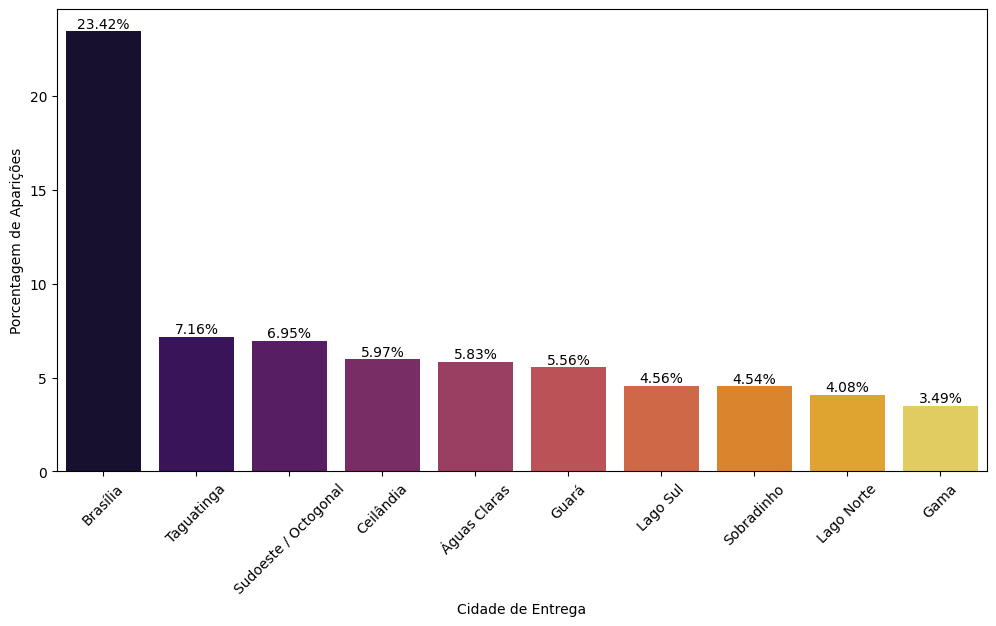

In [ ]:
top_10_cities = prop_city_df.sort_values(ascending=False).head(10)

top_10_cities = top_10_cities.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_cities, x="delivery_city", y=0, palette="inferno")
plt.xticks(rotation=45)

for index, row in top_10_cities.iterrows():
    plt.text(index, row[0], f"{row[0]:.2f}%", ha='center', va='bottom')

plt.xlabel("Cidade de Entrega")
plt.ylabel("Porcentagem de Aparições")
plt.show()


Com o gráfico podemos ver a discrepância dos dados relacionados a Brasília com os dados relacionados as outras cidades.

In [ ]:
# código para analisar qual a frequência em porcentagem dos 10 suburbs que mais aparecem no data frame

prop_suburb_df = deliveries_df[["delivery_suburb"]].value_counts() / len(deliveries_df)*100

prop_suburb_df.sort_values(ascending=False).head(10)

delivery_suburb 
Brasília            8.456352
Asa Norte           7.663928
Taguatinga          6.336251
Asa Sul             5.926285
Águas Claras        5.659838
Guará               5.561905
Samambaia           2.651423
Sobradinho          1.814826
Recanto das Emas    1.502950
P Sul               1.280675
dtype: float64

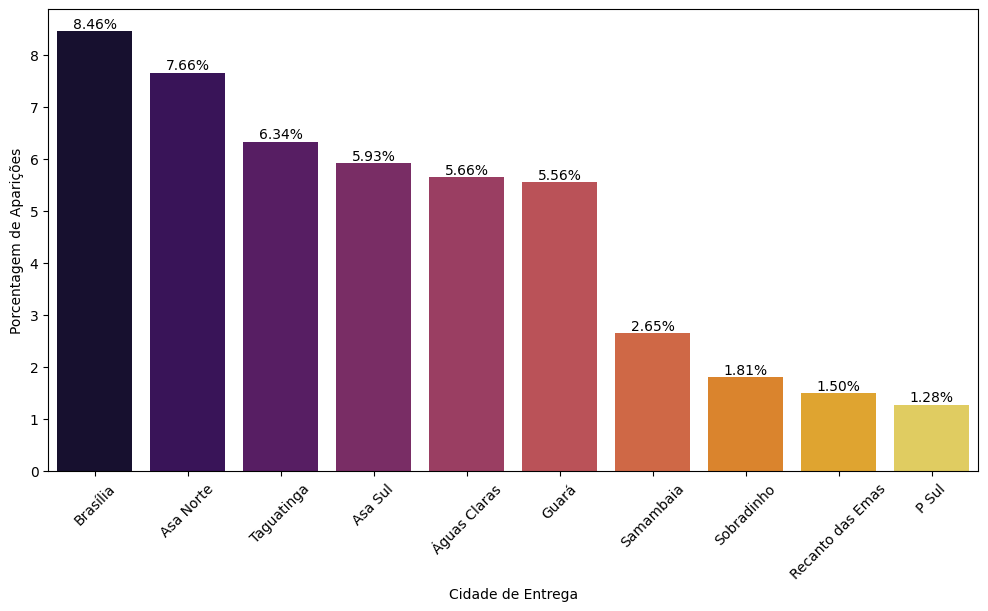

In [ ]:
top_10_cities = prop_suburb_df.sort_values(ascending=False).head(10)

top_10_cities = top_10_cities.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_cities, x="delivery_suburb", y=0, palette="inferno")
plt.xticks(rotation=45)

for index, row in top_10_cities.iterrows():
    plt.text(index, row[0], f"{row[0]:.2f}%", ha='center', va='bottom')

plt.xlabel("Cidade de Entrega")
plt.ylabel("Porcentagem de Aparições")
plt.show()

Com o gráfico podemos análisar que a discrepância vista antes não se aplica aos dados de suburb, por mais que Brasília esteja na frente, a distância para o "segundo lugar" é menor se comparado com a análise anterior.

Abaixo segue análise da quantidade de entregadores por hub.

In [ ]:
prop_deliveries_x_hubs_df = deliveries_df[["name","region"]].drop_duplicates()

prop_deliveries_x_hubs_df.head(19)
contagem = prop_deliveries_x_hubs_df.groupby("region")["name"].count()

qtd_entregadores_df = pd.DataFrame(contagem)
qtd_entregadores_df = qtd_entregadores_df.reset_index()



Index(['region', 'name'], dtype='object')

<ipython-input-462-ac08c20f933c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico_qtd_entregadores = sns.barplot(data=qtd_entregadores_df, x="region", y="name", ci=None, palette="inferno")


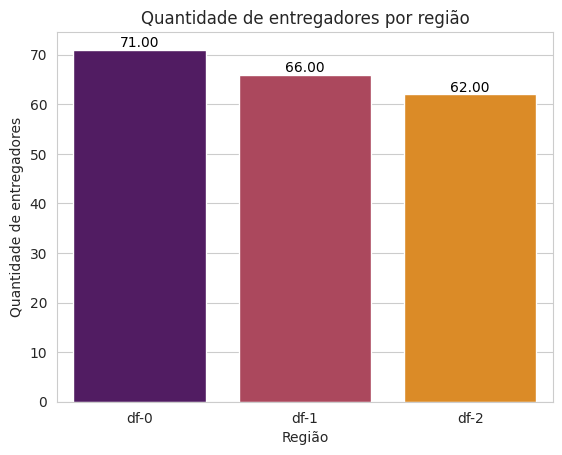

In [ ]:
with sns.axes_style('whitegrid'):
  grafico_qtd_entregadores = sns.barplot(data=qtd_entregadores_df, x="region", y="name", errorbar=None, palette="inferno")
  grafico_qtd_entregadores.set(title='Quantidade de entregadores por região', xlabel='Região', ylabel='Quantidade de entregadores');
  for p in grafico_qtd_entregadores.patches:
    grafico_qtd_entregadores.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


O gráfico nos mostra que o hub de distribuição df-0 possui maior quantidade de entregadores se comparado com os outros dois hubs.

## 5\. Visualização

Após a coleta de todos os dados partiremos para a parte de visualização gáfica e por meio de mapa.

iniciaremos com o download de um arquivo .zip com os dados necessários para essa visualização

In [ ]:
# utilizaremos esse código para extrair os dados que estão nesse link que direciona para uma pasta .zip

!wget -q "ftp://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps
!ls -lh distrito-federal.zip
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

replace ./maps/ASB_Cemiterio_A.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: -rw-r--r-- 1 root root 117M Oct 17 00:56 distrito-federal.zip


In [ ]:
mapa = geopandas.read_file("distrito-federal.shp")
mapa = mapa.loc[[0]]
mapa.head()

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0.00000, -47.3..."


Após fazer a extração dos dados vamos incluí-los num novo data frame com as informações de cada hub de distribuição. A coluna "geometry" será utilizada para indicar o ponto no mapa em que esse hub está localizado, se analizarmos os dados nota-se que os dados dessa coluna começam com a palavra POINT justamente por isso.

In [ ]:
hub_df = deliveries_df[["region", "lng_hub", "lat_hub"]].drop_duplicates().reset_index(drop=True)
geo_hub_df = geopandas.GeoDataFrame(hub_df, geometry=geopandas.points_from_xy(hub_df["lng_hub"], hub_df["lat_hub"]))
geo_hub_df.head()

,region,lng_hub,lat_hub,geometry
0,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
1,df-1,-47.893662,-15.805118,POINT (-47.89366 -15.80512)
2,df-0,-47.802665,-15.657014,POINT (-47.80266 -15.65701)


O mesmo conceito do código acima se aplica no código abaixo porém o data frame gerado será com as informações das entregas.

In [ ]:
geo_deliveries_df = geopandas.GeoDataFrame(deliveries_df, geometry=geopandas.points_from_xy(deliveries_df["delivery_lng"], deliveries_df["delivery_lat"]))
geo_deliveries_df.head()

,name,region,lng_hub,lat_hub,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb,geometry
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul,POINT (-48.11619 -15.84893)
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul,POINT (-48.11819 -15.85077)
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul,POINT (-48.11248 -15.84787)
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul,POINT (-48.11802 -15.84647)
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,POINT (-48.11490 -15.85805)


Abaixo criaremos o mapa visual com os hubs de entrega centralizados e as entregas devidamente localizadas.

<ipython-input-467-687c76a150b1>:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


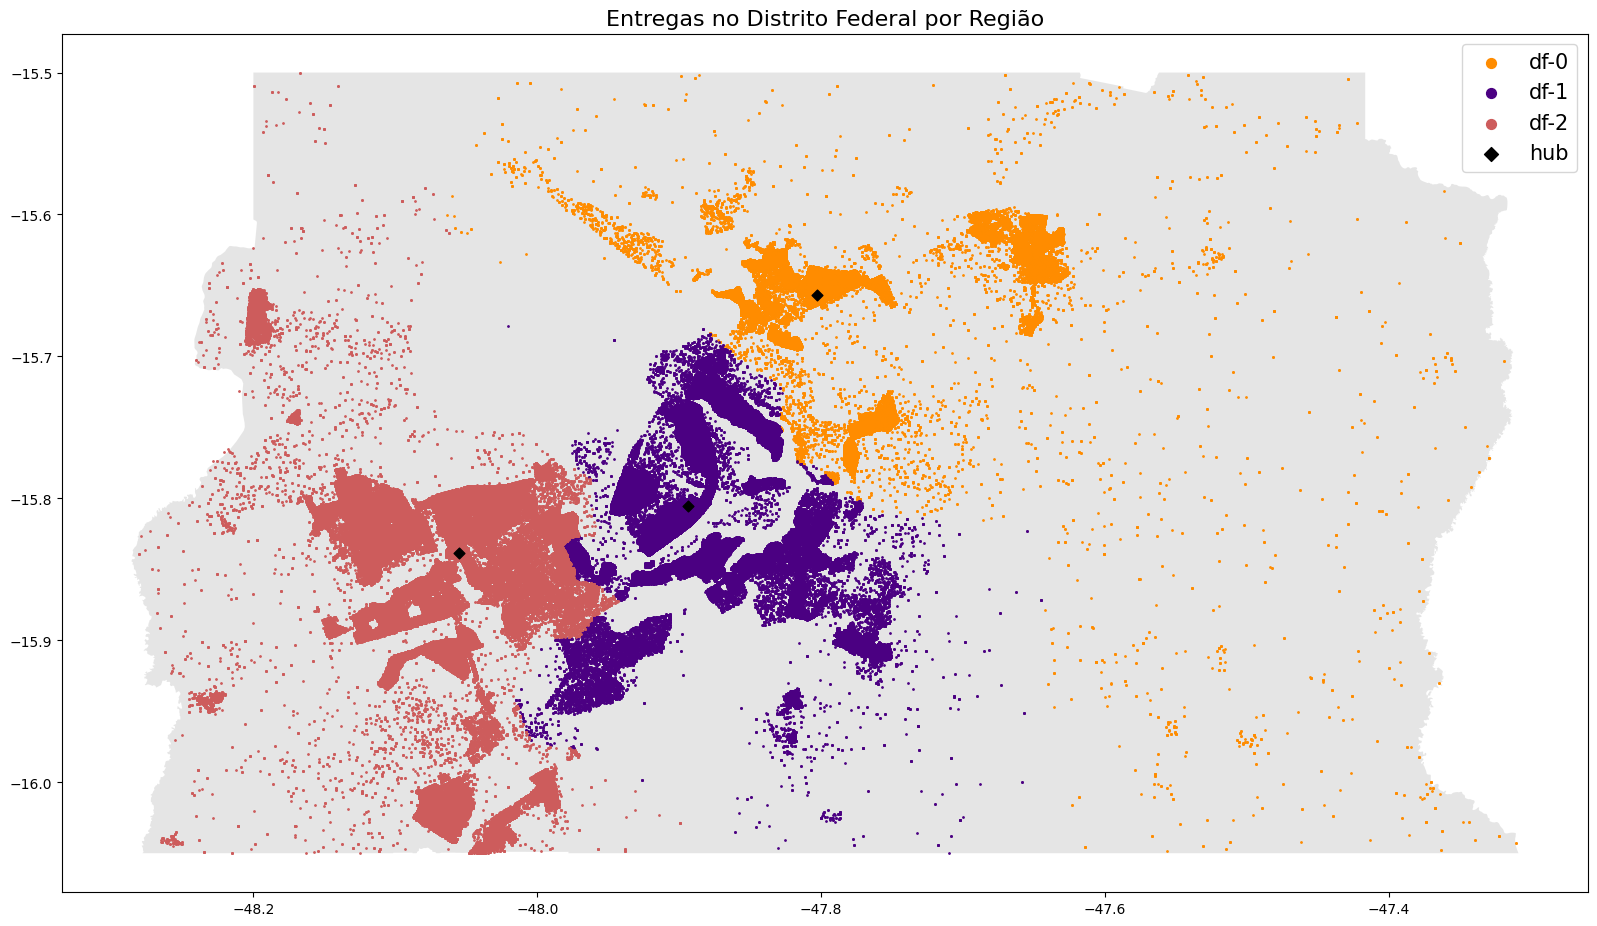

In [ ]:
# criar um plot vazio de 50 por 50
fig, ax = plt.subplots(figsize = (50/2.54, 50/2.54))

# plot mapa do distrito federal
mapa.plot(ax=ax, alpha= 0.4, color="silver")

# plot das marações das entregas
geo_deliveries_df.query("region == 'df-0'").plot(ax=ax, markersize=1, color="darkorange", label="df-0")
geo_deliveries_df.query("region == 'df-1'").plot(ax=ax, markersize=1, color="indigo", label="df-1")
geo_deliveries_df.query("region == 'df-2'").plot(ax=ax, markersize=1, color="indianred", label="df-2")

# plot das marcações dos hubs de distribuição
geo_hub_df.plot(ax=ax, markersize=30, marker="D", color="black", label="hub")

# plot da legenda
plt.title("Entregas no Distrito Federal por Região", fontdict={"fontsize": 16})
lgnd = plt.legend(prop={"size": 15})
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

A seguir analisaremos o pecentual do total de entregas que cada hub de distribuição está responsável.

In [ ]:
data_percentual = pd.DataFrame((deliveries_df[['region', 'vehicle_capacity']].value_counts(normalize=True)*100).round(2)).reset_index()
data_percentual.rename(columns={0: "region_percent"}, inplace=True)
data_percentual.head()

,region,vehicle_capacity,region_percent
0,df-1,180,47.90
1,df-2,180,41.08
2,df-0,180,11.02


<ipython-input-469-df1b530f8d37>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico_percentual = sns.barplot(data=data_percentual, x="region", y="region_percent", ci=None, palette="inferno")


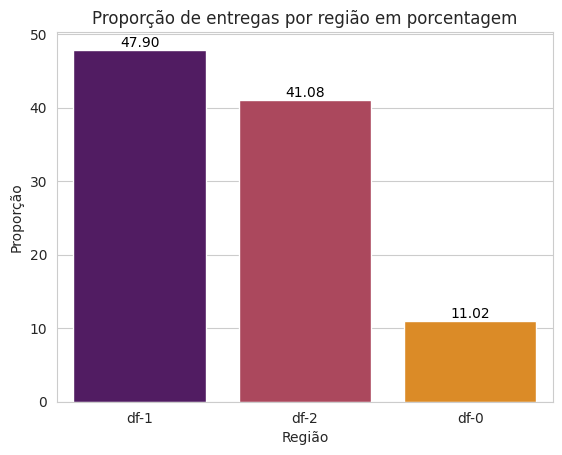

In [ ]:
with sns.axes_style('whitegrid'):
  grafico_percentual = sns.barplot(data=data_percentual, x="region", y="region_percent", ci=None, palette="inferno")
  grafico_percentual.set(title='Proporção de entregas por região em porcentagem', xlabel='Região', ylabel='Proporção');
  for p in grafico_percentual.patches:
    grafico_percentual.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


Abaixo o mesmo conceito das informações acima, porém os valores estão em quantidade e não em porcentagem.

In [ ]:
data_qtd = pd.DataFrame(deliveries_df[['region','vehicle_capacity']].value_counts().reset_index())
data_qtd.rename(columns={0:"region_quantity"}, inplace=True)
data_qtd.head()

,region,vehicle_capacity,region_quantity
0,df-1,180,304708
1,df-2,180,261319
2,df-0,180,70122


<ipython-input-471-d97a317a3762>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico_qtd = sns.barplot(data=data_qtd, x="region", y="region_quantity", ci=None, palette="inferno")


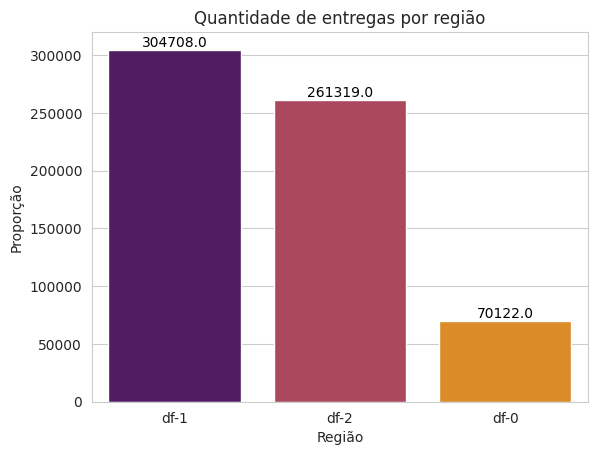

In [ ]:
with sns.axes_style('whitegrid'):
  grafico_qtd = sns.barplot(data=data_qtd, x="region", y="region_quantity", ci=None, palette="inferno")
  grafico_qtd.set(title='Quantidade de entregas por região', xlabel='Região', ylabel='Proporção');

  for p in grafico_qtd.patches:
    grafico_qtd.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


Para finalizar nosso estudo seguiremos com um resumo dos insights obtidos.

#**Insights**#

Após analisar todos os dados pudemos obter alguns insights que podem ser relevantes para alguma tomada de decisão.

insights projeto
- Logo no começo pudemos ver que o hub de distribuição com mais entregas é o df-1 com uma quantidade de 304708 dados, e o com menos entregas é o hub df-0 com uma quantidade bem inferior de 70122, isso ficou mais evidente nas demonstrações gráficas.
- Em seguida pudemos observar que a quantidade de entregadores com mais entregas a serem feitas está localizada novamente na região do hub df-1.
- Após obter essas informações passamos a análise gráfica, iniciando com gráficos indicando a porcentagem de aparição da cidade de cada entrega, e Brasília aparece em 23,42% dos dados, muito além das outras cidades. O segundo colocado é Taguatinga com apenas 7,16% das entregas.
- Na análise de suburb, ou bairro, Brasília novamente aparece na frente, porém com apenas 8,46% dos dados, seguida do suburb Asa Norte que possui 7,66% dos dados.
- Logo em seguida analisamos a quantidade de entregadores por hub de distribuição, e notamos que o hub de distribuição df-0 possui 71 dos 199 entregadores, seguido pelo df-1 que possui 66 e df-2 que possui 62. Talvez seja viável um estudo de recolocação desses entregadores do hub df-0 uma vez que os outros hubs possuem uma maior demanda de entrega.
- A partir da análise do mapa, observa-se que os hubs df-1 e df-2 estão bem centralizados e as entregas estão um pouco misturadas. Já o hub df-0 está mais localizado a direita do mapa e abrange praticamente metade do mapa total, porém a quantidade de entregas é bem menor que os nos outros dois hubs, como podemos ver nos gráficos logo a seguir, apenas 11,02% do total de entregas está localizada na região do df-0. Provavelmente a região do hub df-0 é uma região rural, pela distância de um ponto do outro.
Após as análises nota-se que se faz necessário um estudo de recolocação dos entregadores no hub df-0 para os outros hubs, pois os mesmos possuem uma maior demanda de entregas.

- Pode ser que se faça necessário um quarto hub de distribuição com menos demanda e menos entregadores, mais ao sul do df-0 e sudeste do df-1 para suprir aquela área.

